<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/mod12_ex01_regressa%CC%83o_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regress√£o 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regress√£o de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as vari√°veis necess√°rias como na aula, e reproduza esta regress√£o.

b. Reproduza tamb√©m o gr√°fico de dispers√£o dessas duas vari√°veis.

In [18]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EspecializacÃßaÃÉo em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicacÃßoÃÉes com Python/RegressaÃÉo 1/tips.csv')
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

total_bill   tip     sex smoker  day    time  size   tip_pct  net_bill
0       16.99  1.01  Female     No  Sun  Dinner     2  0.063204     15.98
1       10.34  1.66    Male     No  Sun  Dinner     3  0.191244      8.68
2       21.01  3.50    Male     No  Sun  Dinner     3  0.199886     17.51
3       23.68  3.31    Male     No  Sun  Dinner     2  0.162494     20.37
4       24.59  3.61  Female     No  Sun  Dinner     4  0.172069     20.98

(0.0, 10.45)

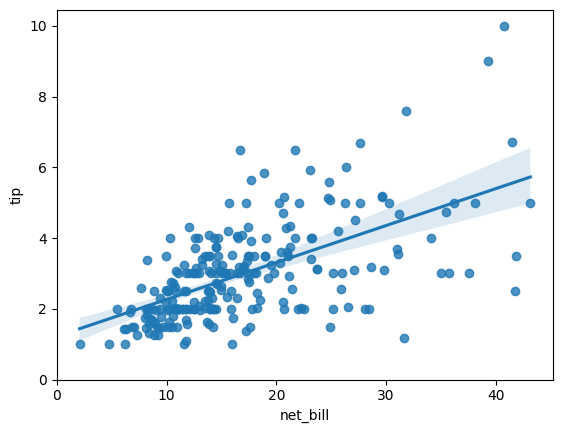

In [ ]:
# Gr√°fico de dispers√£o
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Op√ß√µes est√©ticas para explicitar o (0,0) no gr√°fico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [ ]:
# Modelo de regress√£o linear
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           5.02e-23
Time:                        16:38:28   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudan√ßa de perspectiva

Agora ajuste um modelo de regress√£o de ```tip_pct``` por ```net_bill```. Construa o gr√°fico de dispers√£o correspondente.

In [ ]:
# Modelo de regress√£o linear
reg_1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.52e-06
Time:                        16:39:44   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

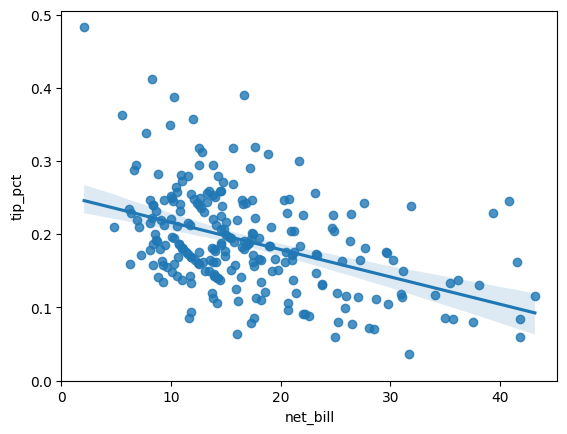

In [ ]:
# Gr√°fico de dispers√£o
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Op√ß√µes est√©ticas para explicitar o (0,0) no gr√°fico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gr√°ficos e comente (de forma objetiva e suscinta) a rela√ß√£o entre eles e a diferen√ßa do ajuste. Podemos comparar diretamente os $R^2$s?

**Modelo 1:** tip ~ net_bill

**Coeficiente da Intercepta√ß√£o:** 1.3307

**Coeficiente de net_bill:** 0.0993 (a cada 1 real a mais na conta l√≠quida, a gorjeta aumenta 0.099, em m√©dia).

**R¬≤:** 0.333 (33% da varia√ß√£o da gorjeta √© explicada pelo valor l√≠quido da conta).

**p-valor do coeficiente:** <0.0001 (significativo).



**Modelo 2:** tip_pct ~ net_bill

**Coeficiente da Intercepta√ß√£o:** 0.3053

**Coeficiente de net_bill:** -0.0061 (a cada 1 real a mais na conta l√≠quida, a porcentagem da gorjeta diminui em 0,61%, em m√©dia).

**R¬≤:** 0.091 (apenas 9% da varia√ß√£o da porcentagem da gorjeta √© explicada pelo valor l√≠quido da conta).

**p-valor do coeficiente:** <0.0001 (significativo).

**Conclus√µes:**

**Modelo tip ~ net_bill:** Explica melhor a varia√ß√£o em valores absolutos da gorjeta (R¬≤ maior). A rela√ß√£o √© positiva, indicando que contas mais altas resultam em gorjetas maiores.

**Modelo tip_pct ~ net_bill:** Mostra que a porcentagem da gorjeta diminui ligeiramente √† medida que o valor da conta l√≠quida aumenta. No entanto, a capacidade do modelo de explicar essa varia√ß√£o √© baixa (R¬≤ pequeno).


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [ ]:
# 1- obtenha o valor predito pred para tip_pct (dica, veja o atributo reg.fittedvalues)
pred = reg_1.fittedvalues
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [ ]:
# 2- obtenha o valor predito para tip como tip_pct * net_bill
tip_pred = pred * tips['net_bill']
tip_pred

0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64

In [20]:
# 3- calcule o ùëÖ^2 do modelo para tip_pred
r2_tip = r2_score(tips['tip'], tip_pred)
r2_tip

0.10889974845461325

In [26]:
# 4- compare esse  ùëÖ2  com o do item 1
r2_original_tip = reg.rsquared

r2_tip, r2_original_tip

(0.10889974845461325, 0.3325407312323707)

Os valores de R2 s√£o os seguintes:

**Modelo reconstru√≠do para tip:** R2 = 0.1089 (usando os valores previstos de tip_pct multiplicados por net_bill).

**Modelo original para tip ~ net_bill:** R2 = 0.3325

**O R2 do modelo reconstru√≠do √© significativamente menor que o do modelo original**. Isso ocorre porque a transforma√ß√£o de tip por meio de tip_pct e net_bill n√£o captura t√£o bem a varia√ß√£o dos dados reais como o modelo original. Portanto, o modelo direto tip ~ net_bill √© mais eficaz para prever os valores de tip.
